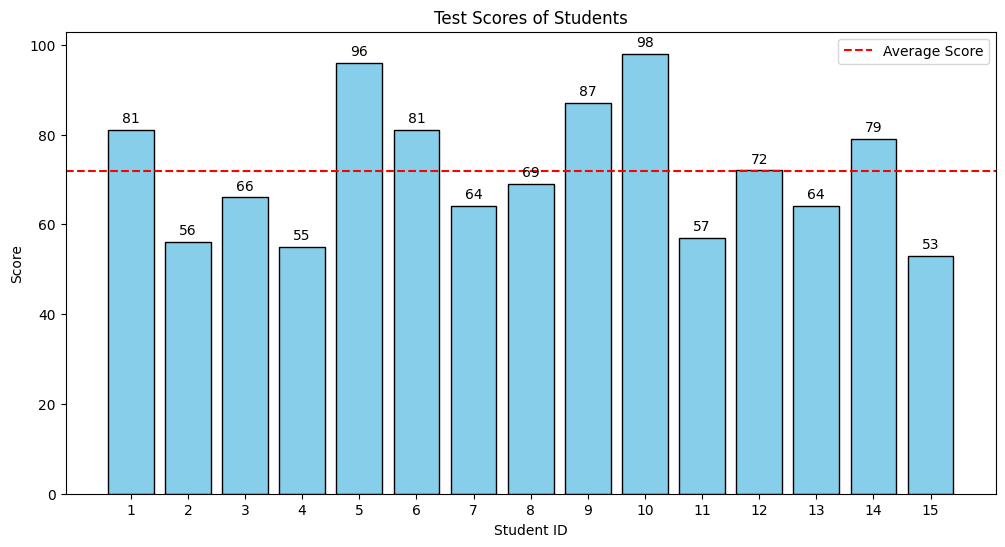

In [30]:
from config import *

url = "http://127.0.0.1:8000/scores-api"
headers = {'Content-Type': 'application/json'}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    avg_score = df['score'].mean()
    plt.figure(figsize=(12, 6))
    bars=plt.bar(df['student_id'], df['score'], color='skyblue', edgecolor='black')
    for bar in bars: # Displaying scores on the bars
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom', color='black')
    plt.axhline(avg_score, color='red', linestyle='--', label='Average Score') # Displaying the average score
    plt.xticks(range(1, len(df) + 1), df['student_id'])
    plt.xlabel('Student ID')
    plt.ylabel('Score')
    plt.title('Test Scores of Students')
    plt.legend()
    plt.show()
else:
    print(f"Failed to fetch data from the API. Status code: {response.status_code}")